## Visualization

Loading Oxford-IIIT Pets dataset with segmentation masks...
Dataset loaded for visualization.
Loading trained U-Net model...
Model loaded successfully.
Visualizing predictions on random test samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


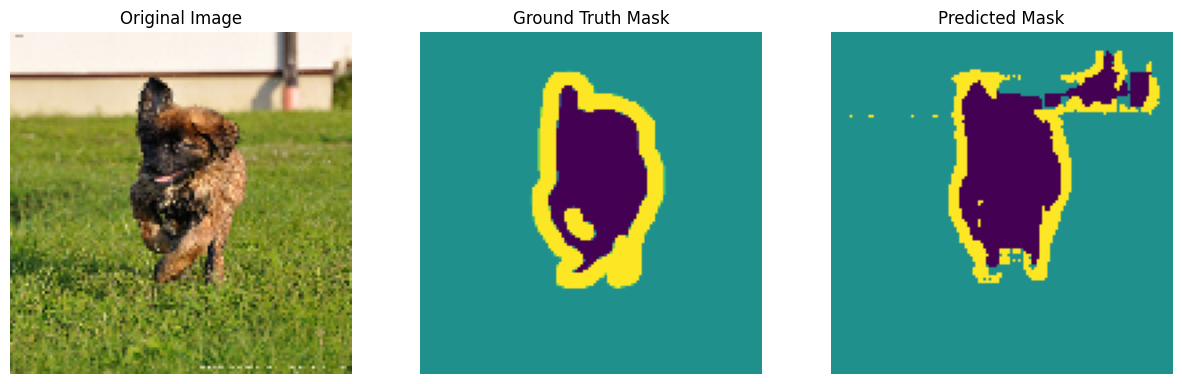

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


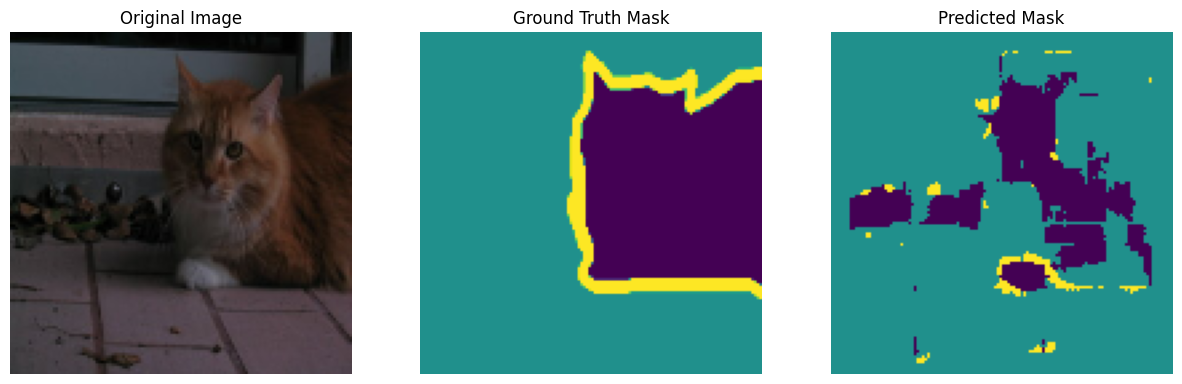

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


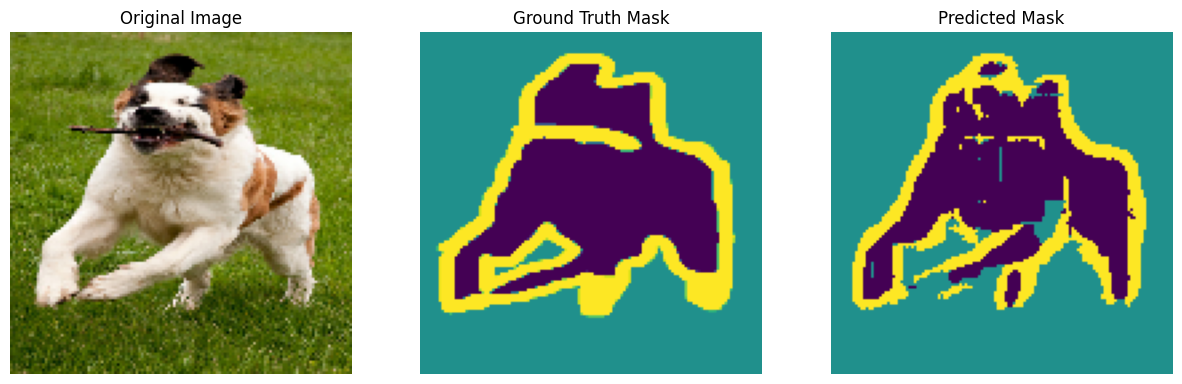

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


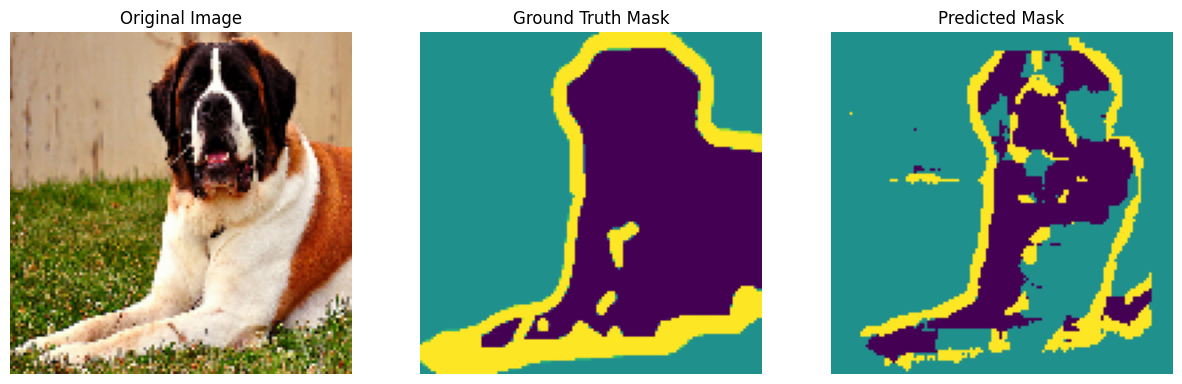

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


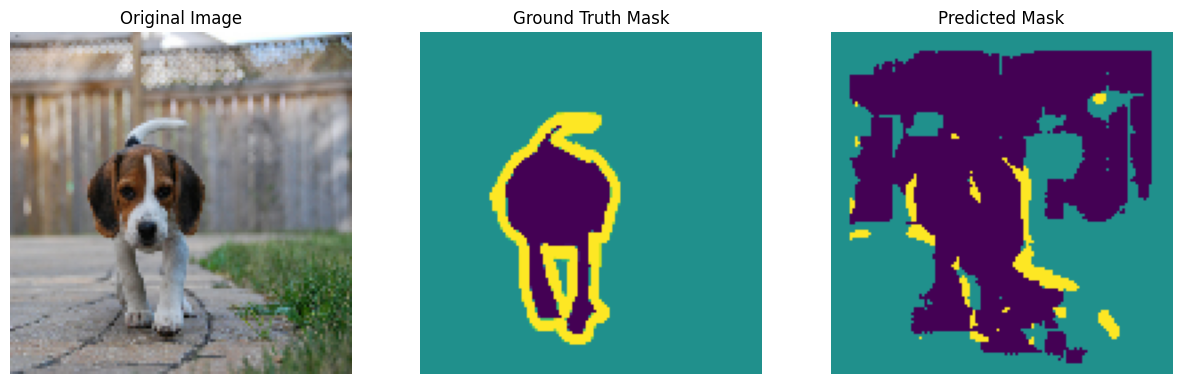

In [ ]:
# week11_visualization_fixed.ipynb

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load Dataset (Oxford Pets with segmentation masks)
IMG_SIZE = 128
print("Loading Oxford-IIIT Pets dataset with segmentation masks...")
dataset, info = tfds.load("oxford_iiit_pet:4.0.0", with_info=True, split=["train", "test"])

def normalize_img_mask(example):
    image = tf.image.resize(example["image"], (IMG_SIZE, IMG_SIZE)) / 255.0
    mask = tf.image.resize(example["segmentation_mask"], (IMG_SIZE, IMG_SIZE))
    return image, mask

test = dataset[1].map(normalize_img_mask).batch(1)  # test set
print("Dataset loaded for visualization.")

# Load Trained Model
print("Loading trained U-Net model...")
model = load_model("./models/unet_model.h5", compile=False)
print("Model loaded successfully.")

# Helper Functions
def create_mask(pred_mask):
    """Convert logits to predicted mask."""
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def display_sample(display_list, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(titles[i])
        plt.imshow(tf.squeeze(display_list[i]))
        plt.axis("off")
    plt.show()

# Visualize Predictions
print("Visualizing predictions on random test samples...")

for images, masks in test.take(5):  # visualize 5 samples
    pred_mask = model.predict(images)
    pred_mask = create_mask(pred_mask)

    display_sample(
        [images[0], masks[0], pred_mask],
        ["Original Image", "Ground Truth Mask", "Predicted Mask"]
    )